# <center>Digital Fiance Final Project </center>
---
---

*by Clément Dardare and Lou Le Gallo*

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import numpy as np
from scipy.stats import kurtosis, skew
import scipy.stats as stats  
from scipy.interpolate import interp1d
import warnings

In [144]:
sns.set_theme()
warnings.filterwarnings('ignore')

In [145]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
# 1) First, we import Data

In [146]:
CAC40 = pd.read_csv('/content/drive/MyDrive/Digital_Finance-MODS205/^FCHI.csv')
US = pd.read_csv('/content/drive/MyDrive/Digital_Finance-MODS205/^IRX.csv')
CAP = pd.read_csv('/content/drive/MyDrive/Digital_Finance-MODS205/CAP.PA.csv')
BN = pd.read_csv('/content/drive/MyDrive/Digital_Finance-MODS205/BN.PA .csv')

In [147]:
CAC40['Date'] = pd.to_datetime(CAC40['Date'])
CAC40 = CAC40.sort_values(by = 'Date')
CAC40.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-24,5377.859863,5413.029785,5377.859863,5394.799805,5394.799805,74560600
1,2017-10-25,5399.609863,5416.540039,5364.160156,5374.890137,5374.890137,80466800
2,2017-10-26,5383.439941,5459.609863,5375.259766,5455.399902,5455.399902,90950700
3,2017-10-27,5470.339844,5513.529785,5470.240234,5494.129883,5494.129883,95585200
4,2017-10-30,5488.330078,5507.560059,5487.290039,5493.629883,5493.629883,67428800


In [148]:
US['Date'] = pd.to_datetime(US['Date'])
US = US.sort_values(by = 'Date')
US.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-24,1.098,1.098,1.098,1.098,1.098,0
1,2017-10-25,1.095,1.098,1.080,1.083,1.083,0
2,2017-10-26,1.080,1.083,1.075,1.080,1.080,0
3,2017-10-27,1.075,1.075,1.073,1.073,1.073,0
4,2017-10-30,1.073,1.080,1.073,1.075,1.075,0


In [149]:
CAP['Date'] = pd.to_datetime(CAP['Date'])
CAP = CAP.sort_values(by = 'Date')
CAP.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-24,101.050003,101.750000,99.290001,99.290001,99.290001,738101
1,2017-10-25,99.110001,103.400002,99.110001,102.199997,102.199997,881454
2,2017-10-26,102.250000,102.949997,101.349998,102.849998,102.849998,643475
3,2017-10-27,103.400002,103.550003,102.699997,103.099998,103.099998,494171
4,2017-10-30,103.300003,103.750000,103.150002,103.449997,103.449997,334019


In [150]:
BN['Date'] = pd.to_datetime(BN['Date'])
BN = BN.sort_values(by = 'Date')
BN.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-24,70.099998,70.620003,69.559998,69.599998,69.599998,1243062
1,2017-10-25,69.519997,69.889999,68.510002,68.660004,68.660004,1628836
2,2017-10-26,68.839996,69.720001,68.790001,69.639999,69.639999,1738960
3,2017-10-27,70.000000,71.040001,69.959999,70.000000,70.000000,1808579
4,2017-10-30,69.910004,69.989998,69.330002,69.459999,69.459999,1267814


---
# 2) Financial analysis of the stocks

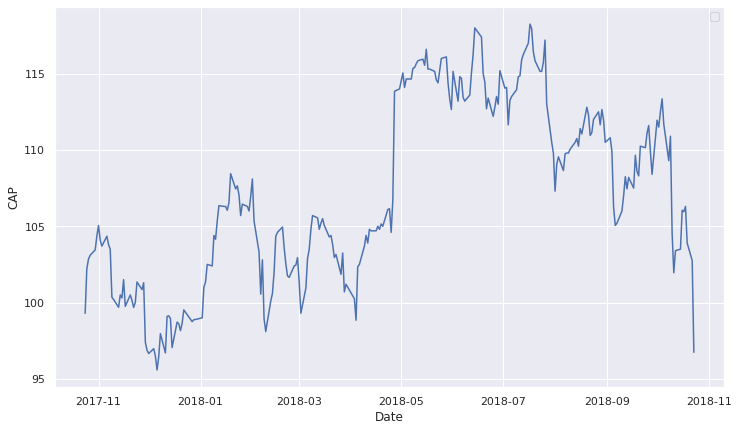

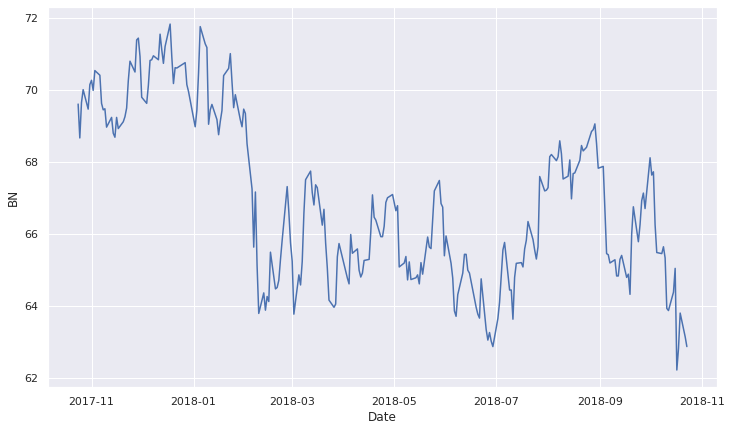

In [151]:
plt.figure(figsize=(12, 7))
plt.plot(CAP['Date'], CAP['Adj Close'])
plt.xlabel("Date")
plt.ylabel("CAP")
plt.legend()
plt.show()

plt.figure(figsize=(12, 7))
plt.plot(BN['Date'], BN['Adj Close'])
plt.xlabel("Date")
plt.ylabel("BN")
plt.show()

### Analysis : 

---
# 3) Compute the return

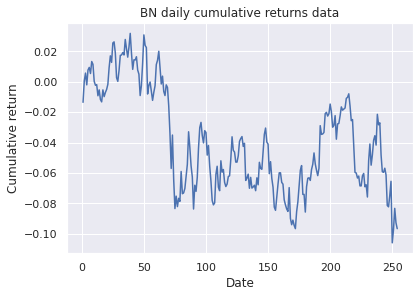

-0.09669539070963684

In [152]:
#First we compute the daily returns by computing the pourcentage change
BN['Daily Return'] = BN['Adj Close'].pct_change()

#Compute the total return
BN['Cumulative Return'] = (1 + BN['Daily Return']).cumprod() - 1

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
BN['Cumulative Return'].plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Cumulative return")
ax1.set_title("BN daily cumulative returns data")
plt.show()

BN['Cumulative Return'].iloc[-1]

the stock price of BN has decreased by 10%

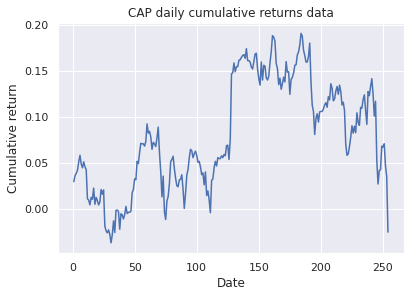

-0.025682374602856273

In [153]:
#First we compute the daily returns by computing the pourcentage change
CAP['Daily Return'] = CAP['Adj Close'].pct_change()

#Compute the total return
CAP['Cumulative Return'] = (1 + CAP['Daily Return']).cumprod() - 1

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
CAP['Cumulative Return'].plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Cumulative return")
ax1.set_title("CAP daily cumulative returns data")
plt.show()

CAP['Cumulative Return'].iloc[-1]

the stock price of BN has decreased by 2,5%

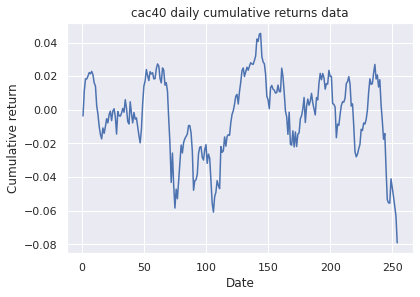

-0.07917066053204402

In [154]:
#First we compute the daily returns by computing the pourcentage change
CAC40['Daily Return'] = CAC40['Adj Close'].pct_change()

#Compute the total return
CAC40['Cumulative Return'] = (1 + CAC40['Daily Return']).cumprod() - 1

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
CAC40['Cumulative Return'].plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Cumulative return")
ax1.set_title("cac40 daily cumulative returns data")
plt.show()

CAC40['Cumulative Return'].iloc[-1]

the stock price of CAC40 has decreased by 8%

---
# 4) kurtusis and asymmetry

for BN the coefficients of Kurtosis is  -1.0349302496059656 , the coefficient of asymmetry is 0.30454070183901627


<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

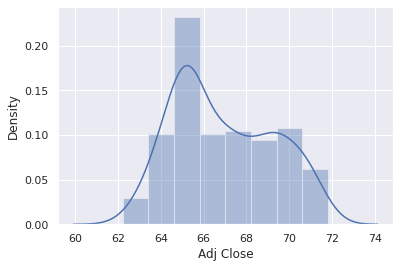

In [155]:
kurtosis_BN = kurtosis(BN['Adj Close'])
skewness_BN = skew(BN['Adj Close'])

print("for BN the coefficients of Kurtosis is ",
      kurtosis_BN,
      ", the coefficient of asymmetry is",
      skewness_BN)

# Plot histograms for each series
sns.distplot(BN['Adj Close'])

for CAP the coefficients of Kurtosis is  -1.15847627460272 , the coefficient of asymmetry is 0.05913959123111702


<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

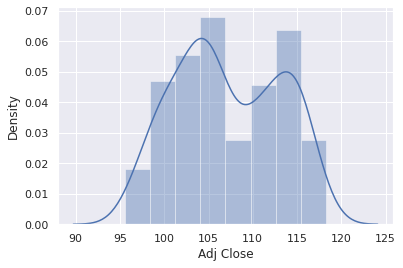

In [156]:
kurtosis_CAP = kurtosis(CAP['Adj Close'])
skewness_CAP = skew(CAP['Adj Close'])

print("for CAP the coefficients of Kurtosis is ",
      kurtosis_CAP,
      ", the coefficient of asymmetry is",
      skewness_CAP)


sns.distplot(CAP['Adj Close'])

for CAC40 the coefficients of Kurtosis is  0.029901183339525517 , the coefficient of asymmetry is -0.6305346103146633


<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

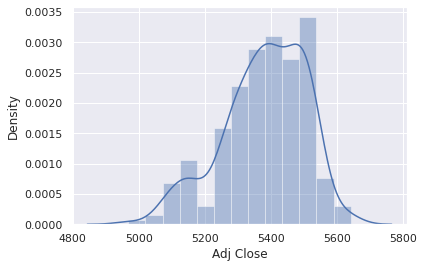

In [157]:
kurtosis_CAC40 = kurtosis(CAC40['Adj Close'])
skewness_CAC40 = skew(CAC40['Adj Close'])

print("for CAC40 the coefficients of Kurtosis is ",
      kurtosis_CAC40,
      ", the coefficient of asymmetry is",
      skewness_CAC40)

sns.distplot(CAC40['Adj Close'])

### Analysis
CAC40 indexes are closer to a normal distribution than CAP and BN.But CAP stack has very little asymmetry.

# 5) Compute standart error

In [158]:
#For BN

# Compute the standard error of the returns for the full period
BN_std_err_full = np.std(BN['Daily Return'], 
                         ddof=1) / np.sqrt(len(BN['Daily Return']))

print("BN full period standard error:", BN_std_err_full)

# Divide each stock's data into 3 sub-periods of equal size
BN_sub_periods = np.array_split(BN['Daily Return'], 3)

# Compute the standard error of the returns for each sub-period
for i in range(3):
    BN_std_err = np.std(BN_sub_periods[i],
                        ddof=1) / np.sqrt(len(BN_sub_periods[i]))
    print(f"BN sub-period {i+1} standard error:", BN_std_err)


BN full period standard error: 0.000658682658918862
BN sub-period 1 standard error: 0.001124159608481489
BN sub-period 2 standard error: 0.0011327769271214346
BN sub-period 3 standard error: 0.0011769501372751105


The volatility is relatively stable over the time for BN.

In [159]:
#For CAP

# Compute the standard error of the returns for the full period
CAP_std_err_full = np.std(CAP['Daily Return'],
                          ddof=1) / np.sqrt(len(CAP['Daily Return']))

print("CAP full period standard error:", CAP_std_err_full)

# Divide each stock's data into 3 sub-periods of equal size
CAP_sub_periods = np.array_split(CAP['Daily Return'], 3)

# Compute the standard error of the returns for each sub-period
for i in range(3):
    CAP_std_err = np.std(CAP_sub_periods[i],
                         ddof=1) / np.sqrt(len(CAP_sub_periods[i]))
    print(f"CAP sub-period {i+1} standard error:", CAP_std_err)

CAP full period standard error: 0.0008523438618561732
CAP sub-period 1 standard error: 0.0014022380650316876
CAP sub-period 2 standard error: 0.0013570604589478496
CAP sub-period 3 standard error: 0.0016505937167816112


For CAP, the volatility isn't constant.


---
# 6) We compute correlation between stocks and the CAC40

In [160]:
corr_BN = BN['Adj Close'].corr(CAC40['Adj Close'])
corr_BN


0.40709234372820885

In [161]:
corr_CAP = CAP['Adj Close'].corr(CAC40['Adj Close'])
corr_CAP

0.5042621005778843

### Analysis
We remark there is much correlation between CAC40 and CAP than between BN and CAC40

---
# 7) Compute return of the portfolio

In [162]:
portfolio = (BN['Daily Return']  + CAP['Daily Return'])/2
portfolio_return = portfolio.mean()
print("Portfolio Return: ", portfolio_return)

portfolio_std =portfolio.std()
print("Portfolio Standard Deviation: ", portfolio_std)

Portfolio Return:  -0.00017743330506343145
Portfolio Standard Deviation:  0.009743226243174082


Analysis :
the portfolio is center



---
# 8) Optimal portfolio

# 9) 3 portfolios

[0.009724027749164433, 0.010497592797842252, 0.013584020566432728]


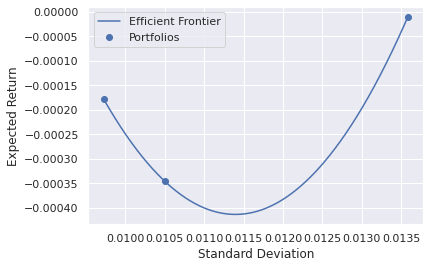

In [163]:
from scipy.interpolate import interp1d, CubicSpline
portfolio3 = (BN['Daily Return']  + CAP['Daily Return'])/2
portfolio1 = BN['Daily Return']
portfolio2 = CAP['Daily Return']

# Compute expected return and standard deviation for each portfolio
portfolios = [portfolio3, portfolio1, portfolio2]
expected_return = [np.mean(p) for p in portfolios]
std_dev = [np.std(p) for p in portfolios]
print(std_dev)


# Create an interpolation function for the efficient frontier
x = np.linspace(min(std_dev), max(std_dev), 1000)
efficient_frontier = CubicSpline(std_dev, expected_return)


# Plot the efficient frontier curve
plt.plot(x, efficient_frontier(x), label='Efficient Frontier')

# Add scatter plot of individual portfolios
plt.scatter(std_dev, expected_return, label='Portfolios')

# Add axis labels and legend
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.legend()
plt.show()


---
# 10) Compute ratios

In [164]:
risk_free_rate = 0.01

sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
sortino_ratio = (portfolio_return - risk_free_rate) / portfolio[portfolio < 0].std()
sterling_ratio = portfolio_return / (portfolio[portfolio < 0].sum() / len(portfolio[portfolio < 0]))

print("Sharpe ratio :", sharpe_ratio)
print("sortino ration :", sortino_ratio)
print("strermin gration :", sterling_ratio)


Sharpe ratio : -1.0445650189220996
sortino ration : -1.5299792057421906
strermin gration : 0.022876227093735622


---
# 11)  Compute the empirical VAR at 1% and  the 1st percentile of the normal distribution


In [165]:
VAR = portfolio.quantile(0.01)
print("Empirical VAR at 1% :", VAR)

Empirical VAR at 1% : -0.028020863543864863


In [166]:
quantile = stats.norm.ppf(0.01, portfolio_return, portfolio_std)
print("1st percentile of the normal distribution :", quantile)

1st percentile of the normal distribution : -0.022843566962170384


---
# 12) We compute the VAR using resampling

In [167]:
# Set number of observations and simulations
n_obs = 1000
n_sim = 10000

# We create array to store simulated returns
sim_returns = np.empty((n_obs, n_sim))

# Simulate returns
for i in range(n_sim):
    # We sample the data
    sample = np.random.choice(portfolio, size=n_obs, replace=True)
    sim_returns[:, i] = sample

print ("var : ", sim_returns.std())

# We compute 1% VAR
var_1pct = np.sort(sim_returns)[-int(n_sim*0.01)]

print("Portfolio 1% VAR using resampling with 1000 observations:", var_1pct)


var :  nan
Portfolio 1% VAR using resampling with 1000 observations: [-0.03396194 -0.03396194 -0.03396194 ...         nan         nan
         nan]


Don't find why 'nan' are here